# SMS Spam Detection

This project aims to use multiple machine learning models to classify SMS messages as spam or ham (not spam).

## Dataset

The project uses the "spam.csv" dataset, which contains SMS messages labeled as either spam or ham. The dataset is preprocessed to clean the text, remove stop words, and lemmatize the words.

## Methodology

1. **Data Cleaning:**
    - Removing special characters and punctuation.
    - Converting text to lowercase.
2. **Tokenization:** Splitting the text into individual words.
3. **Stop Word Removal:** Removing common words that do not carry much meaning (e.g., "the", "a", "is").
4. **Lemmatization:** Reducing words to their base form (e.g., "running" to "run").
5. **Feature Extraction:** Using TF-IDF (Term Frequency-Inverse Document Frequency) to convert the text data into numerical features.
6. **Model Training:** Training different classification models:
    - Naive Bayes
    - Random Forest
    - K-Nearest Neighbors
    - Support Vector Machine
7. **Evaluation:** Evaluating the models using metrics such as precision, recall, F1-score, and accuracy.

## Results

The results of the model evaluation are summarized in a table:

The accuracy of these models are around 97%

## Usage

To run the code in this notebook, you will need to:

1. Install the necessary libraries: `nltk`, `scikit-learn`, `pandas`, `matplotlib`, `seaborn`.
2. Download the "spam.csv" dataset and place it in the same directory as the notebook.
3. Execute the cells in the notebook sequentially.


## Conclusion

This project demonstrates the application of machine learning techniques for predicting if a message should be considered a spam or not based on its content.



In [ ]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from matplotlib.colors import ListedColormap
from sklearn.metrics import precision_score, recall_score, classification_report
from sklearn import metrics

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Sem 8/spam.csv")
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
data.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [ ]:
data.drop(['Unnamed: 2', 'Unnamed: 3','Unnamed: 4'],axis = 1, inplace = True)

In [ ]:
data.rename(columns = {"v1":"Target", "v2":"Text"}, inplace = True)
data.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-12-add4f85416e2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fg = sns.countplot(x= data["Target"],palette = col)


Text(0, 0.5, 'Number of Data points')

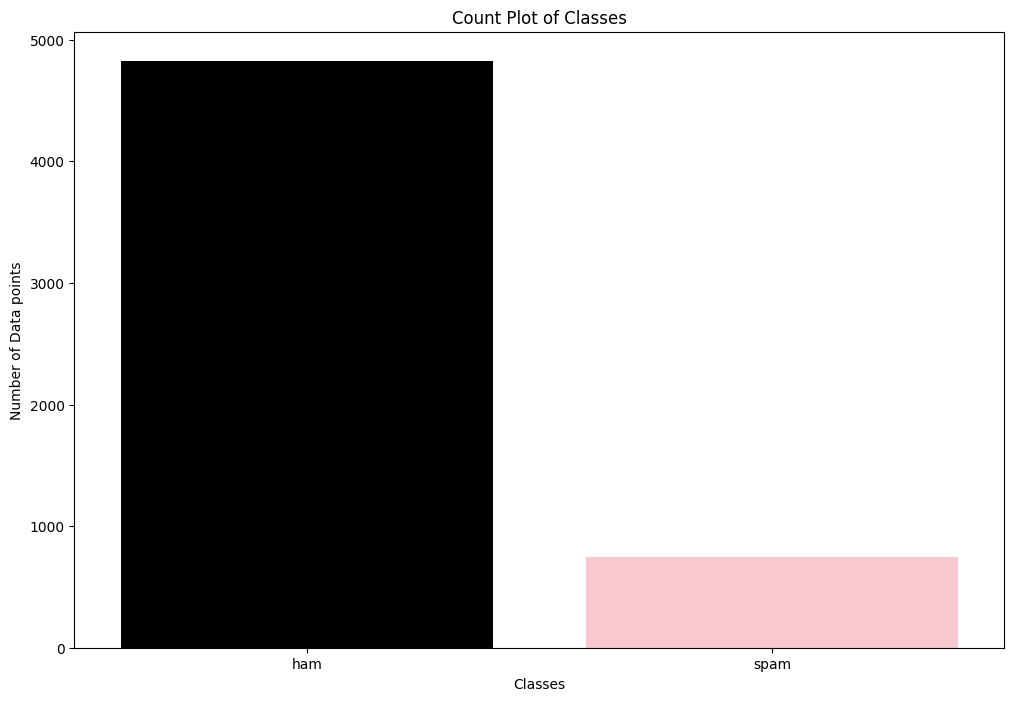

In [ ]:
plt.figure(figsize=(12,8))
col = ['black','pink']
fg = sns.countplot(x= data["Target"],palette = col)
fg.set_title("Count Plot of Classes")
fg.set_xlabel("Classes")
fg.set_ylabel("Number of Data points")

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import re

In [ ]:
def Clean(Text):
  sms = re.sub('[^a-zA-Z]',' ', Text)
  sms = sms.lower()
  sms = sms.split()
  sms = ' '.join(sms)
  return sms

data["Clean_Text"] = data["Text"].apply(Clean)

In [ ]:
data["Tokenize_Text"]=data.apply(lambda row: nltk.word_tokenize(row["Clean_Text"]), axis=1)
print("\033[1m\u001b[45;1m The First 5 Texts after Tokenizing:\033[0m",*data["Tokenize_Text"][:5], sep = "\n")

 The First 5 Texts after Tokenizing:
['go', 'until', 'jurong', 'point', 'crazy', 'available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'there', 'got', 'amore', 'wat']
['ok', 'lar', 'joking', 'wif', 'u', 'oni']
['free', 'entry', 'in', 'a', 'wkly', 'comp', 'to', 'win', 'fa', 'cup', 'final', 'tkts', 'st', 'may', 'text', 'fa', 'to', 'to', 'receive', 'entry', 'question', 'std', 'txt', 'rate', 't', 'c', 's', 'apply', 'over', 's']
['u', 'dun', 'say', 'so', 'early', 'hor', 'u', 'c', 'already', 'then', 'say']
['nah', 'i', 'don', 't', 'think', 'he', 'goes', 'to', 'usf', 'he', 'lives', 'around', 'here', 'though']


In [ ]:
from nltk.corpus import stopwords

def remove_stopwords(text):
    stop_words = set(stopwords.words("english"))
    filtered_text = [word for word in text if word not in stop_words]
    return filtered_text

data["Nostopword_Text"] = data["Tokenize_Text"].apply(remove_stopwords)


In [ ]:
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

def lemmatize_word(text):
    lemmas = [lemmatizer.lemmatize(word, pos ='v') for word in text]
    return lemmas

data["Lemmatized_Text"] = data["Nostopword_Text"].apply(lemmatize_word)
print("\033[1m\u001b[45;1m The First 5 Texts after lemitization:\033[0m",*data["Lemmatized_Text"][:5], sep = "\n")

[nltk_data] Downloading package wordnet to /root/nltk_data...


 The First 5 Texts after lemitization:
['go', 'jurong', 'point', 'crazy', 'available', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'get', 'amore', 'wat']
['ok', 'lar', 'joke', 'wif', 'u', 'oni']
['free', 'entry', 'wkly', 'comp', 'win', 'fa', 'cup', 'final', 'tkts', 'st', 'may', 'text', 'fa', 'receive', 'entry', 'question', 'std', 'txt', 'rate', 'c', 'apply']
['u', 'dun', 'say', 'early', 'hor', 'u', 'c', 'already', 'say']
['nah', 'think', 'go', 'usf', 'live', 'around', 'though']


In [ ]:
corpus= []
for i in data["Lemmatized_Text"]:
    msg = ' '.join([row for row in i])
    corpus.append(msg)

In [ ]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(corpus).toarray()
X.dtype

dtype('float64')

In [ ]:
label_encoder = LabelEncoder()
data["Target"] = label_encoder.fit_transform(data["Target"])

In [ ]:
y = data["Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
classifiers = [MultinomialNB(),
               RandomForestClassifier(),
               KNeighborsClassifier(),
               SVC()]
for cls in classifiers:
    cls.fit(X_train, y_train)

pipe_dict = {0: "NaiveBayes", 1: "RandomForest", 2: "KNeighbours",3: "SVC"}

In [ ]:
for i, model in enumerate(classifiers):
    cv_score = cross_val_score(model, X_train,y_train,scoring="accuracy", cv=10)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

NaiveBayes: 0.966568 
RandomForest: 0.977338 
KNeighbours: 0.914740 
SVC: 0.976217 


In [ ]:
precision =[]
recall =[]
f1_score = []
trainset_accuracy = []
testset_accuracy = []

for i in classifiers:
    pred_train = i.predict(X_train)
    pred_test = i.predict(X_test)
    prec = metrics.precision_score(y_test, pred_test)
    recal = metrics.recall_score(y_test, pred_test)
    f1_s = metrics.f1_score(y_test, pred_test)
    train_accuracy = model.score(X_train,y_train)
    test_accuracy = model.score(X_test,y_test)

    precision.append(prec)
    recall.append(recal)
    f1_score.append(f1_s)
    trainset_accuracy.append(train_accuracy)
    testset_accuracy.append(test_accuracy)

In [ ]:
data = {'Precision':precision,
'Recall':recall,
'F1score':f1_score,
'Accuracy on Testset':testset_accuracy,
'Accuracy on Trainset':trainset_accuracy}



Results = pd.DataFrame(data, index =["NaiveBayes", "RandomForest", "KNeighbours","SVC"])

In [ ]:
Results

,Precision,Recall,F1score,Accuracy on Testset,Accuracy on Trainset
NaiveBayes,0.990991,0.733333,0.842912,0.976682,0.997981
RandomForest,1.000000,0.806667,0.892989,0.976682,0.997981
KNeighbours,1.000000,0.400000,0.571429,0.976682,0.997981
SVC,0.992063,0.833333,0.905797,0.976682,0.997981


In [ ]:
cmap2 = ListedColormap(["#E2CCFF","#E598D8"])
Results.style.background_gradient(cmap=cmap2)

,Precision,Recall,F1score,Accuracy on Testset,Accuracy on Trainset
NaiveBayes,0.990991,0.733333,0.842912,0.976682,0.997981
RandomForest,1.000000,0.806667,0.892989,0.976682,0.997981
KNeighbours,1.000000,0.400000,0.571429,0.976682,0.997981
SVC,0.992063,0.833333,0.905797,0.976682,0.997981
